<a href="https://colab.research.google.com/github/Johnnereparambil/git_john/blob/Autoencoder/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
#uploading the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Data normalisation function
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#latent dimension using for reduce the size
latent_dim = 10

In [5]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim

    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
      layers.BatchNormalization()
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(256, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [6]:
autoencoder = Autoencoder(latent_dim)

In [7]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0394 - val_loss: 0.0193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0186 - val_loss: 0.0175
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0172 - val_loss: 0.0168
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0159 - val_loss: 0.0159
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0157 - val_loss: 0.0157
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0155 - val_loss: 0.0156
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0154 - val_loss: 0.0155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0152 - val_loss: 0.0153


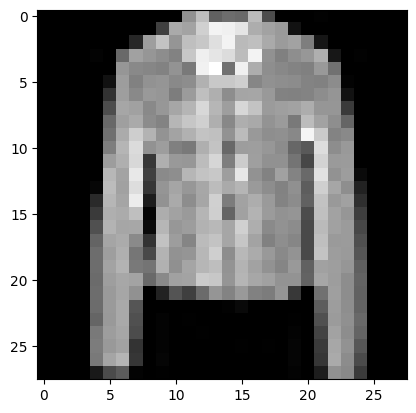

In [9]:
plt.imshow(x_test[10], cmap='gray')
plt.show()

In [10]:
encoded_imgs = autoencoder.encoder(x_test).numpy()

In [11]:
encoded_imgs[0]

array([10.460879  ,  0.49997315, 11.021374  ,  2.5825508 , -0.50838304,
       -0.51874477, 14.278886  ,  5.7236633 ,  4.034823  ,  2.8827152 ],
      dtype=float32)

In [12]:
x_test[10:11].shape

(1, 28, 28)

In [13]:
encoded_imgs.shape

(10000, 10)

In [14]:
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [15]:
decoded_imgs.shape

(10000, 28, 28)

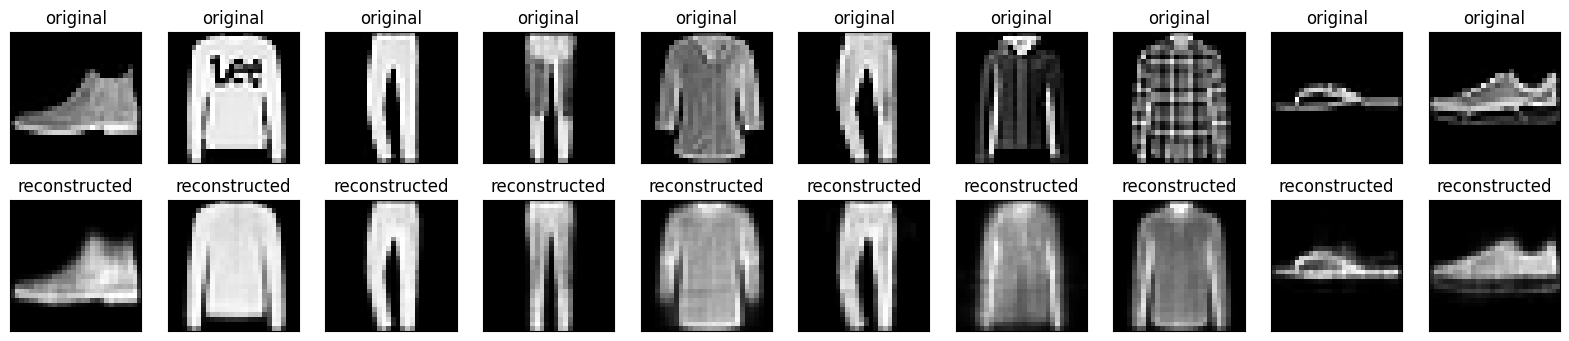

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
random_latent = np.random.normal(loc=0.0, scale=3.0, size=(1, latent_dim))

In [18]:
random_latent.shape

(1, 10)

In [19]:
random_latent

array([[-0.95545229,  2.81629415,  0.62028943,  2.00661374, -1.44935215,
         0.96190986,  0.37657059, -2.10155757, -0.3674622 , -2.7336354 ]])

In [20]:
new_image = autoencoder.decoder(random_latent).numpy()

In [21]:
new_image.shape

(1, 28, 28)

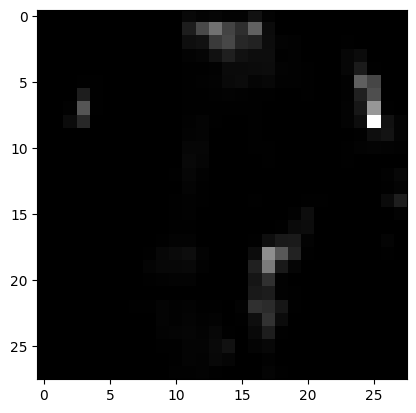

In [22]:
plt.imshow(new_image[0])